In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset=pd.read_csv('/content/cab_rides.csv')

In [ ]:
dataset

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


Data Visualization on Map for uber ride

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 17.5 MB/s 
     |████████████████████████████████| 16.7 MB 210 kB/s 
     |████████████████████████████████| 6.3 MB 38.5 MB/s 


In [ ]:
import geopandas as gpd
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(f"{type(df_world)}, {df_world.geometry.name}")
print(df_world.head())
print(df_world.geometry.geom_type.value_counts())

<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
     pop_est  ...                                           geometry
0     920938  ...  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1   53950935  ...  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2     603253  ...  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3   35623680  ...  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4  326625791  ...  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

[5 rows x 6 columns]
Polygon         148
MultiPolygon     29
dtype: int64


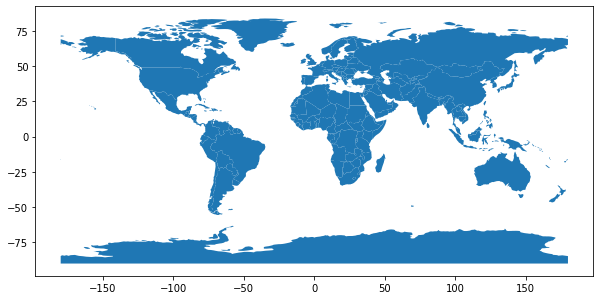

In [ ]:
df_world.plot(figsize=(10,6))

In [ ]:
!pip install openrouteservice folium

In [ ]:
!pip install googlemaps
!pip install simplejson

  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=cc64a1b4a8e84249ee411090768e6b64f9a8bcd186eebbfeeba8b3875879e01e
  Stored in directory: /root/.cache/pip/wheels/80/db/c0/6d958585fa97b20e250bf437acf7e6e715b4809c2dd4e55367
Successfully built googlemaps
     |████████████████████████████████| 130 kB 7.8 MB/s 


In [ ]:
#Getting Source Coordinates
from geopy.geocoders import Nominatim
geolocator=Nominatim()
Source="Haymarket Square"
location=geolocator.geocode(Source)
print(location.address)
print((location.latitude, location.longitude))
Origin=(location.latitude,location.longitude)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Haymarket Square, Dock Square, North End, Boston, Suffolk County, Massachusetts, 02102, United States
(42.3629502, -71.0578447)


In [ ]:
#Getting Destination Coordinates
Destination="Northeastern University"
location1=geolocator.geocode(Destination)
print(location1.address)
print((location1.latitude, location1.longitude))
Destination1=(location1.latitude, location1.longitude)

Northeastern University, 360, Huntington Avenue, South End, Boston, Suffolk County, Massachusetts, 02115, United States
(42.3390301, -71.08791294953176)


In [ ]:
Origin

(42.3629502, -71.0578447)

In [ ]:
import json

In [ ]:
import openrouteservice
client=openrouteservice.Client(key='5b3ce3597851110001cf6248aa4cdc695a0846fa85553f1193fa1c13')
#set location coordinates in longitude,latitude order
coords=((80.21787585263182,6.025423265401452),(80.23929481745174,6.019639381180123))
#res=client.directions(coords)
#call API
res=client.directions(coords)
#test our response
with(open('test.json','+w')) as f:
 f.write(json.dumps(res,indent=4, sort_keys=True))

In [ ]:
from openrouteservice import convert
geometry=client.directions(coords)['routes'][0]['geometry']
decoded=convert.decode_polyline(geometry)
print(decoded)

{'type': 'LineString', 'coordinates': [[80.21799, 6.02544], [80.218, 6.02537], [80.21801, 6.0253], [80.21764, 6.02522], [80.21759, 6.02521], [80.21718, 6.02513], [80.2169, 6.02611], [80.21684, 6.02634], [80.21669, 6.02681], [80.21656, 6.02725], [80.21641, 6.02766], [80.21632, 6.02799], [80.21618, 6.02933], [80.21616, 6.02952], [80.21613, 6.02958], [80.21612, 6.02959], [80.21612, 6.02961], [80.21612, 6.02962], [80.21615, 6.02968], [80.2161, 6.03001], [80.2161, 6.03006], [80.21609, 6.03024], [80.21606, 6.03033], [80.21603, 6.0304], [80.21598, 6.03051], [80.21596, 6.03052], [80.21596, 6.03054], [80.21595, 6.03056], [80.21596, 6.03058], [80.21596, 6.0306], [80.216, 6.03064], [80.21602, 6.03065], [80.21604, 6.03065], [80.21607, 6.03064], [80.21643, 6.03068], [80.21661, 6.03076], [80.21671, 6.03081], [80.21685, 6.03089], [80.21695, 6.03107], [80.21696, 6.03109], [80.21698, 6.03111], [80.217, 6.03113], [80.21711, 6.03129], [80.21713, 6.03137], [80.2172, 6.03168], [80.21728, 6.03201], [80.2172

In [ ]:
import folium
# Initialize the Map instance
m = folium.Map(location=[6.074834613830474, 80.25749815575348],zoom_start=10, control_scale=True,tiles="cartodbpositron")
folium.GeoJson(decoded).add_to(m)
m.save('map.html')

In [ ]:
distance_txt = "<h4> <b>Distance :&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['distance']/1000,1))+" Km </strong>" +"</h4></b>"
duration_txt = "<h4> <b>Duration :&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['duration']/60,1))+" Mins. </strong>" +"</h4></b>"

In [ ]:
folium.GeoJson(decoded).add_child(folium.Popup(distance_txt+duration_txt,max_width=300)).add_to(m)

In [ ]:
folium.Marker(
    location=list(coords[0][::-1]),
    popup="Galle fort",
    icon=folium.Icon(color="green"),
).add_to(m)

folium.Marker(
    location=list(coords[1][::-1]),
    popup="Jungle beach",
    icon=folium.Icon(color="red"),
).add_to(m)

In [ ]:
m.save('map.html')

In [ ]:
dataset.shape

(693071, 10)

In [ ]:
dataset.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
import warnings
warnings.filterwarnings('ignore')

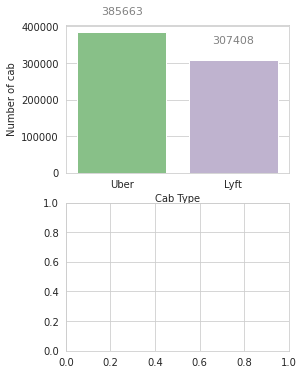

In [ ]:
sns.set_style('whitegrid')
f,axes = plt.subplots (2,1, figsize=(4,6))
#histogram
x=['Uber','Lyft']
y=[dataset.cab_type[(dataset.cab_type)=='Uber'].count(),\
     dataset.cab_type[(dataset.cab_type)=='Lyft'].count()]
visual=sns.barplot(x,y,palette='Accent',ax=axes[0])
visual.set(xlabel='Cab Type',ylabel='Number of cab')
for p in visual.patches:
             visual.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

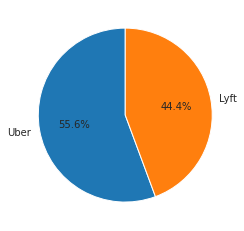

In [ ]:
cabs=[dataset.cab_type[(dataset.cab_type)=='Uber'].count(),\
             dataset.cab_type[(dataset.cab_type)=='Lyft'].count()]  
cab_type=['Uber','Lyft']
plt.pie(cabs,labels=cab_type,startangle=90,autopct='%.1f%%')
plt.show()

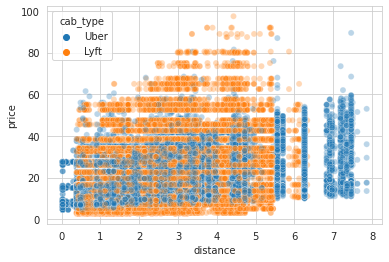

In [ ]:
Taxi=dataset[dataset.name == 'Taxi'].index
dataset.drop(Taxi , inplace=True)
vis1=sns.scatterplot(x=dataset.distance,y=dataset.price,data=dataset,hue=dataset.cab_type,hue_order=cab_type,alpha=0.3,legend='full')

Surge in Price VS Distance Graph

[link text](https://)Price Surge is a factor where fare is multiplied by a certain rate during Rush hours

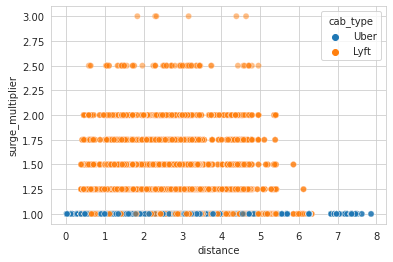

In [ ]:
vis1=sns.scatterplot(x=dataset.distance,y=dataset.surge_multiplier,data=dataset,hue=dataset.cab_type,hue_order=cab_type,alpha=0.3,legend='full')

Calculating Surge rides on only Lyft Rides

In [ ]:
LyftOnly=dataset[dataset.cab_type == 'Lyft']
LyftOnlyData=LyftOnly.groupby(['name','surge_multiplier'],as_index=False).count()

In [ ]:
LyftOnlyData.head(5)

,name,surge_multiplier,distance,cab_type,time_stamp,destination,source,price,id,product_id
0,Lux,1.00,47040,47040,47040,47040,47040,47040,47040,47040
1,Lux,1.25,2217,2217,2217,2217,2217,2217,2217,2217
2,Lux,1.50,1013,1013,1013,1013,1013,1013,1013,1013
3,Lux,1.75,484,484,484,484,484,484,484,484
4,Lux,2.00,481,481,481,481,481,481,481,481


In [ ]:
LyftOnlyData.surge_multiplier.unique()

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.5 , 3.  ])

Surge Multiplier for Lyft

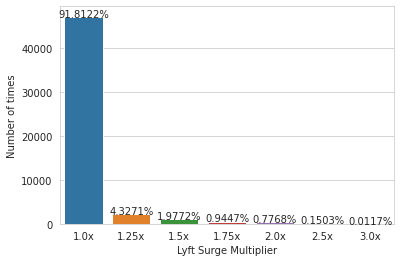

In [ ]:
LyftOnlyData[:][22:29]
B=LyftOnlyData[22:29]['id']
Surge=B    
Surge_Factor=['1.0x','1.25x','1.5x','1.75x','2.0x','2.5x','3.0x']

lyftsurge=sns.barplot(x=Surge_Factor,y=B)
lyftsurge.set(xlabel='Lyft Surge Multiplier',ylabel='Number of times')

total=sum(B/100)
for p in lyftsurge.patches:
     height=p.get_height()
     lyftsurge.text(p.get_x()+p.get_width()/2., height + 3, '{:1.4f}%'.format(height/total),ha="center") 
plt.show()

In [ ]:
UberUnique=dataset.name[dataset.cab_type=='Uber'].unique()
LyftUnique=dataset.name[dataset.cab_type=='Lyft'].unique()
UberRideCount=dataset.name[dataset.name=='UberXL'].count(),dataset.name[dataset.name=='Black'].count(), dataset.name[dataset.name=='UberX'].count(),dataset.name[dataset.name=='WAV'].count(),dataset.name[dataset.name=='Black SUV'].count(),dataset.name[dataset.name=='UberPool'].count()
LyftRideCount=dataset.name[dataset.name=='Shared'].count(),dataset.name[dataset.name=='Lux'].count(),dataset.name[dataset.name=='Lyft'].count(),dataset.name[dataset.name=='Lux Black XL'].count(), dataset.name[dataset.name=='Lyft XL'].count(),dataset.name[dataset.name=='Lux Black'].count()

In [ ]:
UberUnique

array(['UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [ ]:
LyftUnique

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black'],
      dtype=object)

In [ ]:
UberRideCount

(55096, 55095, 55094, 55096, 55096, 55091)

In [ ]:
LyftRideCount

(51233, 51235, 51235, 51235, 51235, 51235)

Fares vs Distance Scatterplot for every ride type

NameError: ignored

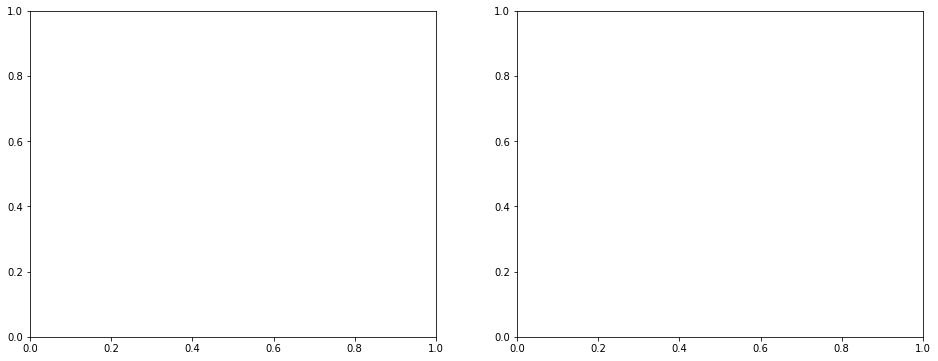

In [ ]:
LyftOnly2=dataset[dataset.cab_type == 'Lyft']
UberOnly=dataset[dataset.cab_type == 'Uber']

g, axes = plt.subplots (1,2, figsize=(16,6))

vis1=sns.scatterplot(x=LyftOnly2.distance,y=LyftOnly2.price,data=LyftOnly2, hue=LyftOnly.name, ax=axes[1])
vis2=sns.scatterplot(x=UberOnly.distance,y=UberOnly.price,data=UberOnly, hue=UberOnly.name, ax=axes[0])

vis1.set(xlim=(-0.5, 8.5))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.5, 8.5))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')


axes[1].set_title('Lift Fare vs Distance by car type')
axes[0].set_title('Uber Fare vs Distance by car type')
plt.ioff()

In [ ]:
Join_TDS=UberOnly.merge(LyftOnly2, how='inner',on=['time_stamp','destination','source'])

In [ ]:
Join_TDS = Join_TDS.drop(columns=["id_x","product_id_x","id_y","product_id_y","surge_multiplier_x","surge_multiplier_y"])

In [ ]:
A=Join_TDS[Join_TDS.name_x == 'WAV'].index
Join_TDS.drop(A , inplace=True)
A=Join_TDS[Join_TDS.name_x == 'Black'].index
Join_TDS.drop(A , inplace=True)
A=Join_TDS[Join_TDS.name_y == 'Lux'].index                
Join_TDS.drop(A , inplace=True)
A=Join_TDS[Join_TDS.name_y == 'Lux Black'].index                
Join_TDS.drop(A , inplace=True)

Prices differentiated by Ride types. Both for Uber and Lyft

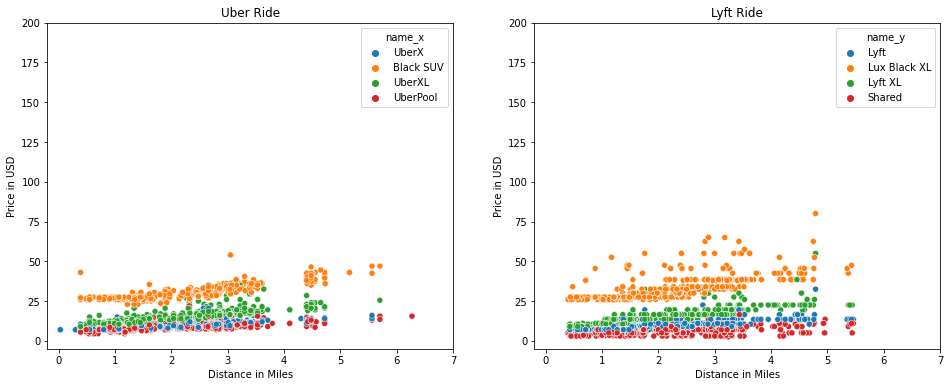

In [ ]:
g, axes = plt.subplots (1,2, figsize=(16,6))

U1=['UberX','Black SUV','UberXL','UberPool']
L1=['Lyft','Lux Black XL','Lyft XL','Shared']

vis1=sns.scatterplot(x=Join_TDS.distance_x,y=Join_TDS.price_x,data=Join_TDS,hue='name_x',hue_order=U1,ax=axes[0])
vis2=sns.scatterplot(x=Join_TDS.distance_y,y=Join_TDS.price_y,data=Join_TDS,hue='name_y',hue_order=L1,ax=axes[1])

vis1.set(xlim=(-0.2, 7))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.2, 7))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis1.set_title('Uber Ride')
vis2.set_title('Lyft Ride')

plt.ioff()

In [ ]:
import datetime
#convert 13digit time stamp to datetime format
dataset['time']= pd.to_datetime(dataset['time_stamp'], unit='ms')
#extract hours only
dataset['hour']= dataset['time'].dt.hour
dataset['fare_per_mile']= round(dataset.price/dataset.distance,2)

#drop unwanted rows that is not comparable
A=dataset[dataset.name == 'WAV'].index
dataset.drop(A , inplace=True)
A=dataset[dataset.name == 'Black'].index
dataset.drop(A , inplace=True)
A=dataset[dataset.name == 'Lux'].index                
dataset.drop(A , inplace=True)
A=dataset[dataset.name == 'Lux Black'].index                
dataset.drop(A , inplace=True)

Ride Availability based on the hour of the day

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


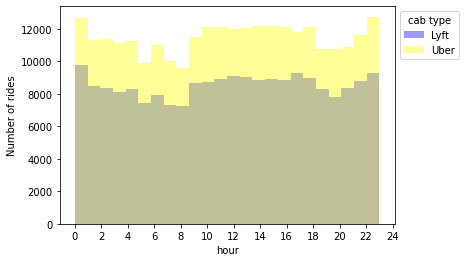

In [ ]:
LyftOnly=dataset[dataset.cab_type=='Lyft']
UberOnly=dataset[dataset.cab_type=='Uber']
vis1 = sns.distplot(LyftOnly.hour,bins=24,kde=False, color='blue')
vis2 = sns.distplot(UberOnly.hour,bins=24,kde=False,color='yellow')
plt.xticks(range(0, 25,2))
plt.legend(title='cab type', loc='upper left', labels=['Lyft','Uber'],bbox_to_anchor=(1,1))
vis1.set(ylabel='Number of rides')
plt.ioff()

Price Graph for every ride type from Lyft and Uber

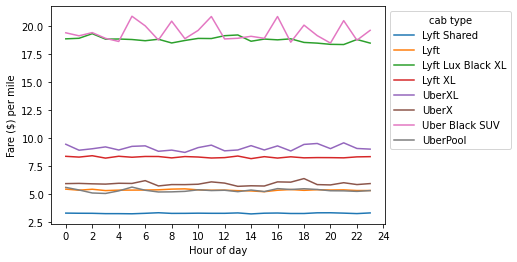

In [ ]:
vis1 = sns.lineplot(x=dataset.hour, y=dataset.fare_per_mile,\
                    data=dataset, hue=dataset.name,err_style=None)

plt.xticks(range(0, 25,2))
vis1.set(xlabel='Hour of day',ylabel='Fare ($) per mile')
plt.legend(title='cab type', loc='upper left', labels=['Lyft Shared', 'Lyft','Lyft Lux Black XL','Lyft XL',\
                                                     'UberXL','UberX','Uber Black SUV','UberPool'],bbox_to_anchor=(1,1))

plt.ioff()

In [ ]:
list(Join_TDS.columns.values)
A = Join_TDS[['time_stamp',
 'destination','source',
'distance_x', 'cab_type_x', 'price_x', 'name_x']]

A.columns=['time_stamp',
 'destination','source',
'distance', 'cab_type', 'price', 'name']

B = Join_TDS[['time_stamp',
 'destination','source',
'distance_y', 'cab_type_y', 'price_y', 'name_y']]

B.columns=['time_stamp',
 'destination','source',
'distance', 'cab_type', 'price', 'name']
FPM=A.append(B)

In [ ]:
FPM['fare_per_mile']= round(FPM.price/FPM.distance,2)

BoxPlot for fares

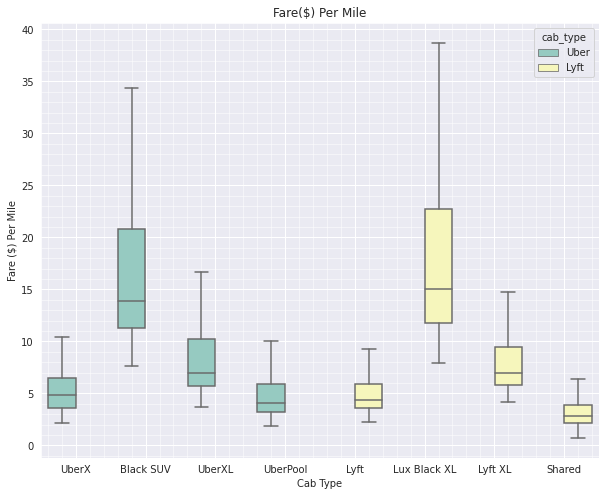

In [ ]:
O1=['UberX', 'Black SUV', 'UberXL', 'UberPool', 'Lyft', 'Lux Black XL',
        'Lyft XL','Shared']

import matplotlib as mpl
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))

vis1 = sns.boxplot( data = FPM, x = 'name', y = 'fare_per_mile', \
                   showfliers=False, hue='cab_type',order=O1,palette='Set3')


vis1.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
vis1.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

vis1.set_title('Fare($) Per Mile')
vis1.set(xlabel='Cab Type',ylabel='Fare ($) Per Mile')

vis1.grid(b=True, which='major', color='w', linewidth=1)
vis1.grid(b=True, which='minor', color='w', linewidth=0.5)
plt.ioff()

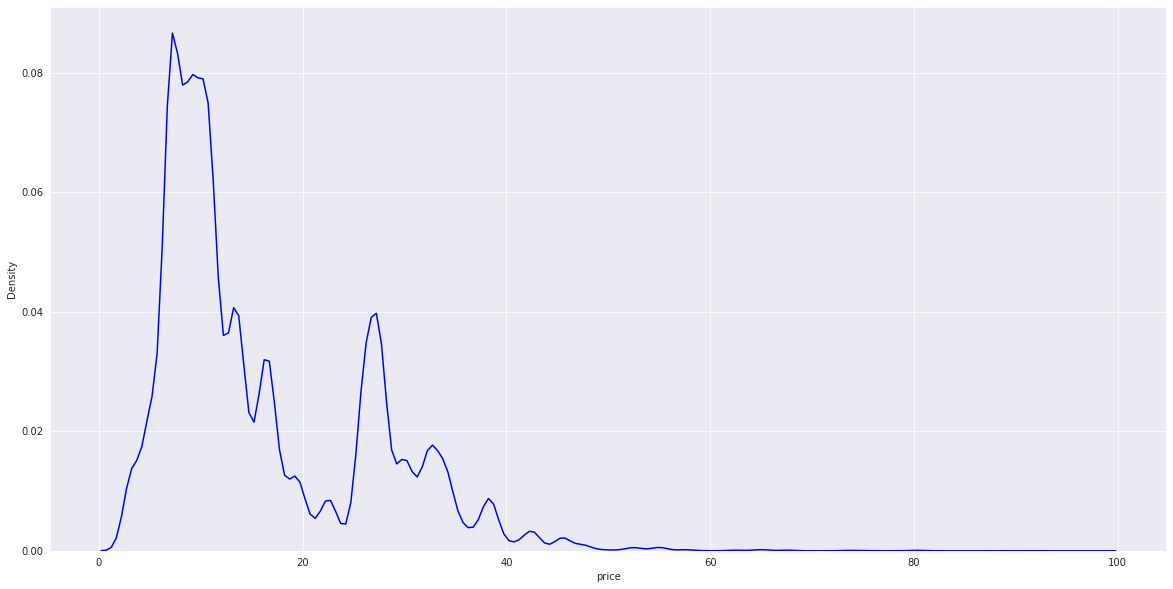

In [ ]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=dataset, x='price', color='blue', weights=50,levels=10, thresh=10 )

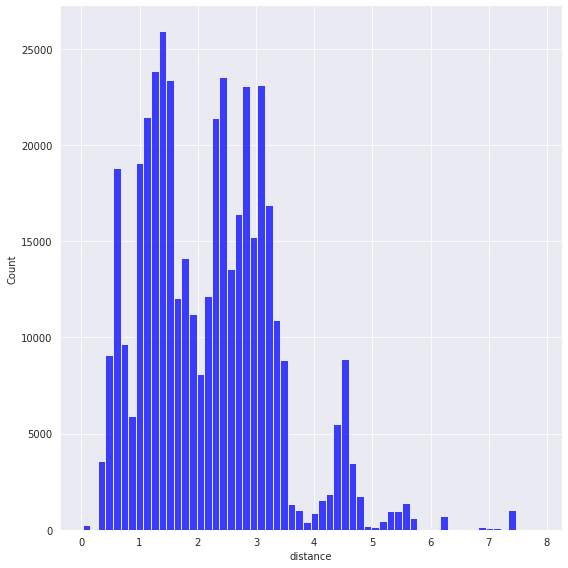

In [ ]:
sns.displot(data=dataset, x='distance', bins=60, color='blue', height=8)

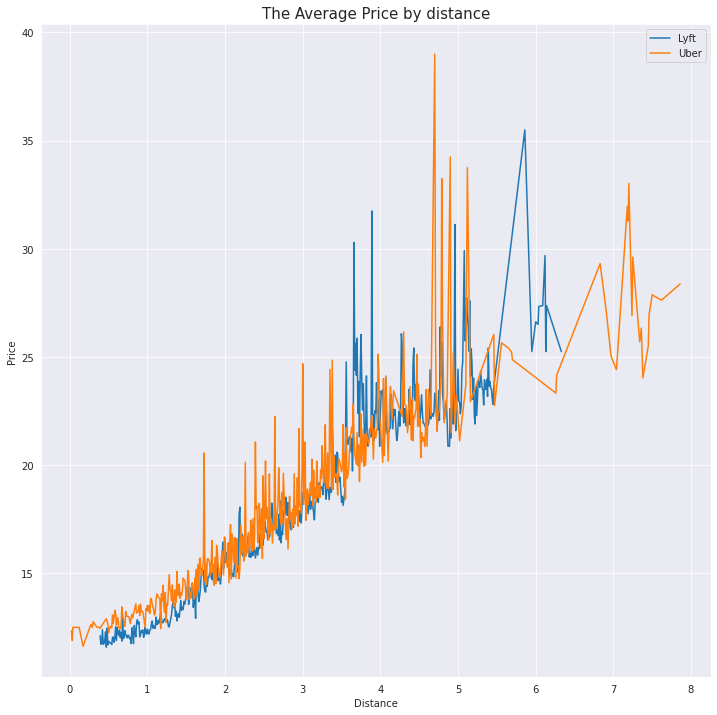

In [ ]:
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(dataset[dataset['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, dataset[dataset['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(dataset[dataset['cab_type'] == 'Uber'].groupby('distance').price.mean().index, dataset[dataset['cab_type'] =='Uber'].groupby('distance').price.mean(), label = 'Uber')
ax.set_title('The Average Price by distance', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()